In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving macrodata.csv to macrodata.csv


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('macrodata.csv',index_col=0,parse_dates=True)
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008-12-31,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009-03-31,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009-06-30,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


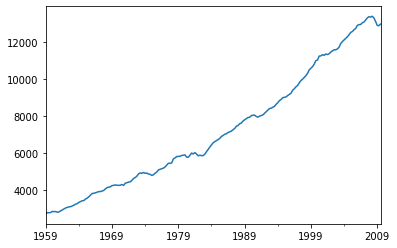

In [ ]:
ax = df['realgdp'].plot()
ax.autoscale(axis='x',tight=True)

Hodrick-Prescott Filter (X-Lambda) 
yt = Tt+ ct

In [ ]:
df.describe()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,1983.876847,2.492611,7221.171901,4825.293103,1012.863862,663.328640,5310.540887,105.075788,667.927586,5.311773,5.884729,239.724153,3.961330,1.336502
std,14.686817,1.118563,3214.956044,2313.346192,585.102267,140.863655,2423.515977,61.278878,455.346381,2.803071,1.458574,37.390450,3.253216,2.668799
min,1959.000000,1.000000,2710.349000,1707.400000,259.764000,460.400000,1886.900000,28.980000,139.600000,0.120000,3.400000,177.146000,-8.790000,-6.790000
25%,1971.000000,1.500000,4440.103500,2874.100000,519.147500,527.959500,3276.950000,41.050000,228.650000,3.515000,4.900000,208.631000,2.270000,-0.085000
50%,1984.000000,2.000000,6559.594000,4299.900000,896.210000,662.412000,4959.400000,104.100000,540.900000,5.010000,5.700000,236.348000,3.240000,1.340000
75%,1996.500000,3.000000,9629.346500,6398.150000,1436.681500,773.049000,6977.850000,159.650000,1102.100000,6.665000,6.800000,271.721500,4.975000,2.630000
max,2009.000000,4.000000,13415.266000,9363.600000,2264.721000,1044.088000,10077.500000,218.610000,1673.900000,15.330000,10.700000,308.013000,14.620000,10.950000


In [ ]:
# We have to Use Stat Model for Hordick Prescott Filter

from statsmodels.tsa.filters.hp_filter import hpfilter


In [ ]:
# How to unpack The Tuple 
gdp_cycle , gdp_trend = hpfilter(df['realgdp'],lamb=1600)
gdp_cycle

1959-03-31     39.511915
1959-06-30     80.088532
1959-09-30     48.875455
1959-12-31     30.591933
1960-03-31     64.882667
                 ...    
2008-09-30    102.018455
2008-12-31   -107.269472
2009-03-31   -349.047706
2009-06-30   -397.557073
2009-09-30   -333.115243
Name: realgdp, Length: 203, dtype: float64

In [ ]:
type(gdp_cycle)

pandas.core.series.Series

In [ ]:
df['trend']=gdp_trend

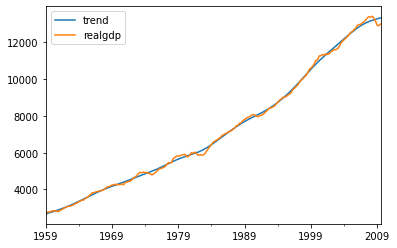

In [ ]:
df[['trend','realgdp']].plot().autoscale(axis='x',tight=True)

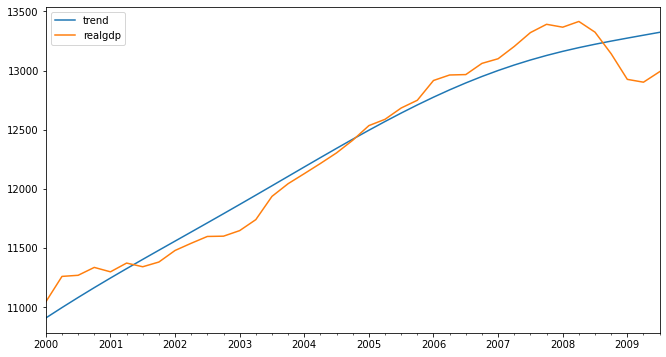

In [ ]:
df[['trend','realgdp']]['2000-03-31':].plot(figsize=(11,6)).autoscale(axis='x',tight=True)

OLS - Ordinary Least Squares - Basically It is One Kind Estimation

In [ ]:
import numpy as np 
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
np.random.seed(9876789)

Artificial Data 

In [ ]:
nsample =100
x = np.linspace(0,10,100)
X=np.column_stack((x,x**2))
beta = np.array([1,0.1,10])
e = np.random.normal(size=nsample)

In [ ]:
X = sm.add_constant(X)
y = np.dot(X,beta) + e

In [ ]:
model=sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Wed, 24 Jun 2020   Prob (F-statistic):          2.83e-239
Time:                        15:10:06   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.0

In [ ]:
print('Paramters:',results.params)
print('R2' , results.rsquared)

Paramters: [ 1.34233516 -0.04024948 10.01025357]
R2 0.9999879365025871


In [ ]:
# OLS for Non Linear but Linear in paramaters

In [ ]:
nsample = 50
sig = 0.5
x = np.linspace(0,20, nsample)
X = np.column_stack((x,np.sin(x),(x-5)**2, np.ones(nsample)))
beta = [0.5,0.5,-0.02,5.]

y_true = np.dot(X,beta)
y = y_true + sig * np.random.normal(size=nsample)

In [ ]:
res = sm.OLS(y,X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     211.8
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           6.30e-27
Time:                        15:20:39   Log-Likelihood:                -34.438
No. Observations:                  50   AIC:                             76.88
Df Residuals:                      46   BIC:                             84.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4687      0.026     17.751      0.0

In [ ]:
print('Parameters:' , res.params)
print('Standard errors:' , res.bse)
print('Predicted values:' , res.predict())

Parameters: [ 0.46872448  0.48360119 -0.01740479  5.20584496]
Standard errors: [0.02640602 0.10380518 0.00231847 0.17121765]
Predicted values: [ 4.77072516  5.22213464  5.63620761  5.98658823  6.25643234  6.44117491
  6.54928009  6.60085051  6.62432454  6.6518039   6.71377946  6.83412169
  7.02615877  7.29048685  7.61487206  7.97626054  8.34456611  8.68761335
  8.97642389  9.18997755  9.31866582  9.36587056  9.34740836  9.28893189
  9.22171529  9.17751587  9.1833565   9.25708583  9.40444579  9.61812821
  9.87897556 10.15912843 10.42660281 10.65054491 10.8063004  10.87946503
 10.86825119 10.78378163 10.64826203 10.49133265 10.34519853 10.23933827
 10.19566084 10.22490593 10.32487947 10.48081414 10.66779556 10.85485568
 11.01006072 11.10575781]


In [ ]:
# Lets try to Crrate or Compare the true relationship to 

AttributeError: ignored

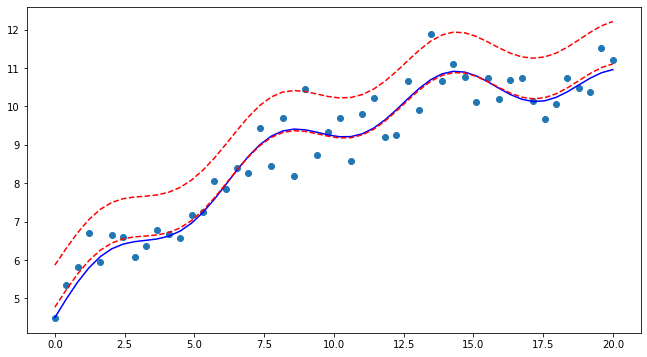

In [ ]:
prstd , iv_l , iv_u = wls_prediction_std(res)

fig , ax = plt.subplots(figsize=(11,6))

ax.plot(x,y, 'o' , label = 'date')
ax.plot(x,y_true , 'b-' , label = 'True')
ax.plot(x,res.fittedvalues, 'r--', label = 'OLS')
ax.plot(x,iv_u, 'r--')
x.plot(x,iv_l , 'r--')

ax.legend(loc='best')

In [ ]:
res2 = sm.OLS(y,X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     211.8
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           6.30e-27
Time:                        15:32:49   Log-Likelihood:                -34.438
No. Observations:                  50   AIC:                             76.88
Df Residuals:                      46   BIC:                             84.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4687      0.026     17.751      0.0

In [ ]:
# Joint Hypotheis Test

In [ ]:
# We have to Ue Both Coef on the variable are Equal to to Zero 
# R * Beta = 0 n F Tesst leads us very effective way to reject 
# nu hypotheis of identical contaant in the 3 group

In [ ]:
R = [[0,1,0,0],[0,0,1,0]]
print(np.array(R))
print(res2.f_test(R))

[[0 1 0 0]
 [0 0 1 0]]
<F test: F=array([[34.45508853]]), p=7.164481588010197e-10, df_denom=46, df_num=2>
